# Assignment 9 - Data Analytics III

Problem Statement

Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.   
Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

# Theory Before Assignment

Naive Bayes is a **supervised** machine learning algorithm used mainly for classification tasks.
It is based on Bayes' Theorem and the **naive assumption** that **all features are independent of each other**.

**P(A∣B)= (P(B∣A)×P(A))/P(B)**

Where:
𝑃(𝐴∣𝐵) = Probability of A (class) given B (features)  
𝑃(𝐵∣𝐴) = Probability of B (features) given A (class)  
𝑃(𝐴) = Probability of A (class) (prior probability)  
𝑃(𝐵) = Probability of B (features)  

**​2. Why is it called "Naive"?**
It is called naive because it assumes that all features (variables) are completely independent of each other — which is rarely true in real-world data.
But even with this silly assumption, it works surprisingly well for many problems!
 
**3. How does Naive Bayes work?**   
Step 1: It calculates the probability of each class given the input features.   
Step 2: It selects the class with the highest probability.    

It uses probability and frequency from the training data to make decisions

**4. Where is Naive Bayes used?**
1. Spam Detection (email is spam or not)
2. Sentiment Analysis (positive or negative review)
3. Medical Diagnosis (disease detection)
4. Text Classification (news categories)

**5. Types of Naive Bayes Models:**

| Type           | When to use                                   |
|----------------|------------------------------------------------|
| Gaussian NB    | When features are continuous and normally distributed |
| Multinomial NB | When features are counts (e.g., word counts in text) |
| Bernoulli NB   | When features are binary (0 or 1) |


# Assignment 9 - Data Analtyics III

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.drop(columns=["Id"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Let us look at the correlation with target feature.
# Inorder to do so, we need to encode our target feature first

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["encoded_species"] = le.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [6]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.corr(numeric_only=True)["encoded_species"]

SepalLengthCm      0.782561
SepalWidthCm      -0.419446
PetalLengthCm      0.949043
PetalWidthCm       0.956464
encoded_species    1.000000
Name: encoded_species, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import numpy as np

In [9]:
X = df.select_dtypes(include=["number"]).drop(columns=["encoded_species"]).values
y = df.select_dtypes(include=["number"])["encoded_species"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

In [15]:
precision_score(y_test, y_pred, average='weighted')

1.0

In [16]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
# TP, TN, FP, FN for generalized Confusion Matrix

def calculate_tp_tn_fp_fn(cm: np.ndarray):
    """
        Calculates TP, TN, FP, FN for each class in any confusion matrix.
    """
    results = []
    n_classes = cm.shape[0]
    for i in range(n_classes):
        TP = int(cm[i, i])
        FP = int(cm[:, i].sum() - cm[i, i])
        FN = int(cm[i, :].sum() - cm[i, i])
        TN = int(cm.sum() - (TP + FP + FN))
        
        results.append({
            'class': i,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        })
    return results


In [21]:
metrics = calculate_tp_tn_fp_fn(cm)
for m in metrics:
    print(m)

{'class': 0, 'TP': 10, 'FP': 0, 'FN': 0, 'TN': 20}
{'class': 1, 'TP': 9, 'FP': 0, 'FN': 0, 'TN': 21}
{'class': 2, 'TP': 11, 'FP': 0, 'FN': 0, 'TN': 19}


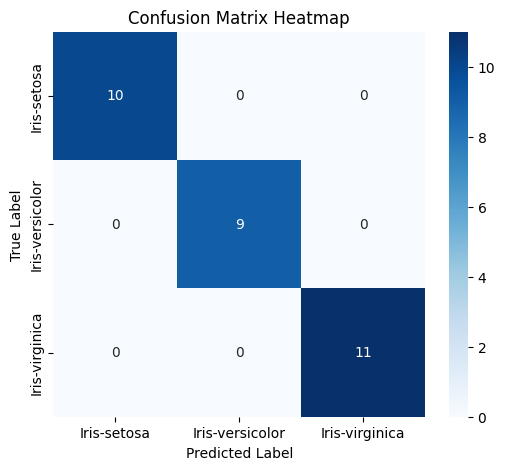

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = le.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# K-Fold Cross Validation

K-Fold Cross Validation is a smart way to check if your model is really good — not just lucky on one train-test split.

Instead of splitting your data into only one train-test,   
✅ it splits the data into K parts ("folds")  
✅ trains the model K times  
✅ tests it each time on a different fold  
✅ then averages the results.  

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation accuracy scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.9533333333333334
